# **Denoising**
<hr/>

**Task 1:** Finding correlation <br/>
**Task 2:** Finding edges through filter <br/>
**Task 3:** Salt and pepper noise <br/>
**Task 4:** Image denoising and sharpening



**Importing Necessary Libraries**

In [39]:

import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
import cv2
import random

**Loading Image**

In [40]:
image_path = r'D:\CV\images\Frogrbc1000x.jpg' 


In [41]:
#Loading in grayscale form
img = cv2.imread(image_path, 0)


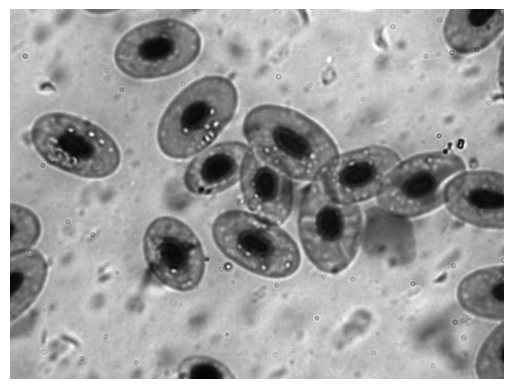

In [42]:
# Displaying the image
plt.imshow(img, cmap='gray')
plt.axis('off')  
plt.show()

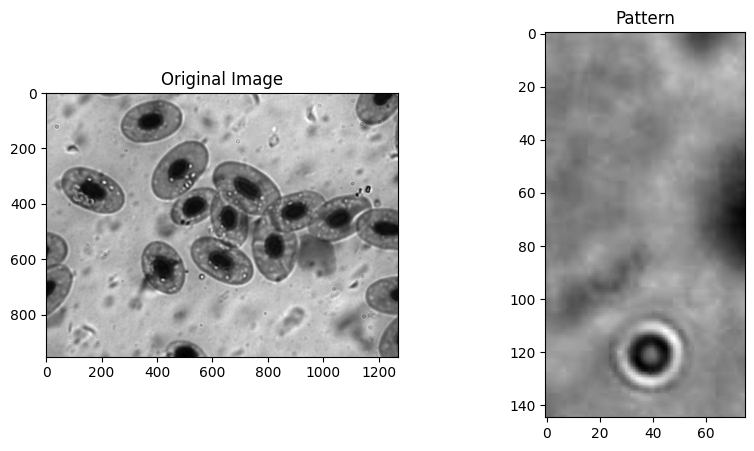

In [43]:
#Extracting portion from the image
pattern = img[0:145, 0:75]
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.imshow(img, cmap='gray',)
ax1.set_title("Original Image")
ax2 = fig.add_subplot(122)
ax2.imshow(pattern, cmap='gray', label="Repeated Pattern")
ax2.set_title("Pattern")

plt.show()

**Finding Correlation**

In [44]:
## Defining the edge detection kernel 
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])


In [45]:
# Using filter2D
edge = cv2.filter2D(img, -1, kernel)
edge_normalized = cv2.normalize(edge, None, 0, 255, cv2.NORM_MINMAX)

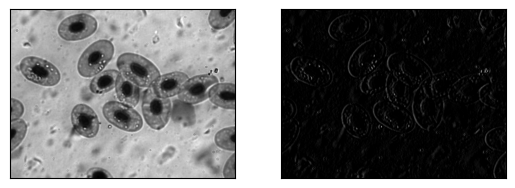

In [46]:
# Displaying the original image
plt.subplot(121)
plt.imshow(img, cmap='gray') 
plt.xticks([]), plt.yticks([])

# Displaying the edge-detected image
plt.subplot(122)
plt.imshow(edge_normalized, cmap='gray')  
plt.xticks([]), plt.yticks([])


plt.show()

**Adding Salt and Pepper**

In [47]:
#Defining the probability
prob = 0.2

In [48]:
#Original iimage to add noise
output = np.copy(img) 

In [49]:
# Generating random numbers for salt and pepper noise
num_salt = np.ceil(prob * img.size * 0.5)
num_pepper = np.ceil(prob * img.size * 0.5)

In [50]:
#Adding salt noise
coords_salt = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
output[coords_salt[0], coords_salt[1]] = 25 

In [51]:
#Adding pepper noise
coords_pepper = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
output[coords_pepper[0], coords_pepper[1]] = 0  

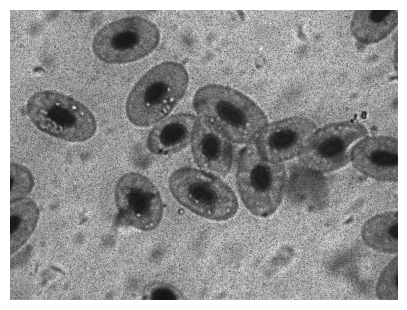

In [52]:
# Displaying the noisy image
plt.figure(figsize=(5, 5))
plt.imshow(output, cmap='gray')
plt.axis('off')  
plt.show()

**Removing the noise on the image using Gaussian blur and Median blur**

In [53]:
# Applying Gaussian blur
sigmaX = 0.8
sigmaY = 0.8
gblurr2 = cv2.GaussianBlur(img, (5, 5), sigmaX)

In [54]:
# Applying Median blur
mblurr2 = cv2.medianBlur(img, 5)

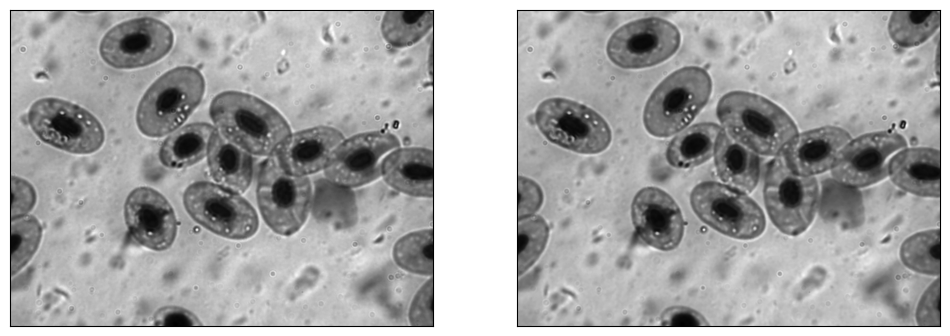

In [56]:
#Displaying
fig = plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(gblurr2, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(mblurr2, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()